### Descenso del Gradiente 

El descenso de gradiente es un algoritmo de optimizacion que sirve para encontrar el minimo de una función.

Para realizar el algoritmo se utilizara el lenguaje Python junto con las librerias pandas, numpy, matplotlib y seabon.


### Autor

**Francisco del Val Yagüe** 

### Fecha 

13/11/2020

### Objetivos 

El objetivo es comprender el funcionamiento del algoritmo de descendo de gradeintes usando código Python 

###  Descripción 

En los datos, tenemos registros de la puntuación de dos exámenes de solicitantes anteriores y etiqueta si el solicitante obtuvo la admisión o no (1 → si obtuvo la admisión y 0 → en caso contrario).

NumPy es el único paquete que usaremos para implementar el algoritmo de regresión logística. Todos los demás solo nos ayudarán con pequeñas tareas, como visualizar los datos disponibles o crear un conjunto de datos. Por lo tanto, no utilizaremos paquetes de soluciones ya implementados para la regresión logística.

### IMPORTACIÓN DE LIBRERIAS 

In [130]:
# Librerias:
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import lmplot
import matplotlib.pyplot as plt
%matplotlib inline

### CARGA Y VISUALIZACIÓN BASE DE DATOS

In [131]:
# Carga Base de Datos :
data = pd.read_csv('../data/4_1_data.csv')

In [132]:
# vemos las primeras filas 
data.head()

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [133]:
# vemos las ultimos filas 
data.tail()

,score-1,score-2,label
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   score-1  100 non-null    float64
 1   score-2  100 non-null    float64
 2   label    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


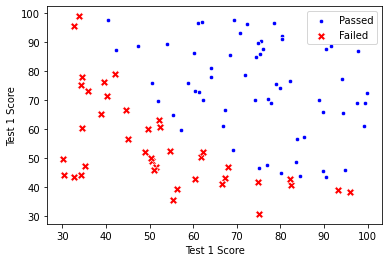

In [135]:
scores = data[['score-1', 'score-2']].values # usamos values para crear una lista con las puntuaciones 
results = data['label'].values # creamos una lista con los resultados que pueden ser 0= no admitido o 1= admitido 

passed = (results == 1).reshape(100, 1) # creamos un objeto en forma matricial con resultado=1 que fueron los admitidos
failed = (results == 0).reshape(100, 1) # creamos un objeto con resultado=0 que fueron los no admitidos

# creamos un grafico (scaterplot) donde representmos los objetos admitidos en azul con '.' y no admitidos en rojo con'x'
ax = sns.scatterplot(x = scores[passed[:, 0], 0],  
                     y = scores[passed[:, 0], 1],
                     marker = ".",
                     color = "blue",
                     s = 80)
sns.scatterplot(x = scores[failed[:, 0], 0],
                    y = scores[failed[:, 0], 1],
                    marker = "X",
                    color = "red",
                    s = 60)

ax.set(xlabel="Test 1 Score", ylabel="Test 1 Score") # nombres de del eje x  y  eje y 
ax.legend(["Passed", "Failed"]) # leyenda 
plt.show();

Como podemos observar tenemos dos variables predictorias examen 1 y examen2 que los podemos clasificar de forma binaria, es decir, clase 1 o clase 0.

### FUNCIÓN SIGMOIDEA LOGÍSTICA

Ahora aplicamos la regresion logística para entrenar un modelo, para encontrar el limite de decision optimo y hacer prediccion de clases.
El objetivo de la regresión logística es minimizar la función de costo

*1º) Función sigmoidea* 

Esta función es la "activación" para la salida de la regresión logística. Convierte una entrada continua en un valor entre cero y uno. Este valor se puede interpretar como la probabilidad de la clase o la probabilidad de que el ejemplo de entrada se clasifique positivamente. Usando esta probabilidad junto con un valor umbral, podemos obtener una predicción de etiqueta discreta.

In [136]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

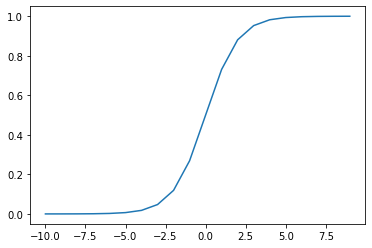

In [137]:
x = np.arange(-10., 10., 1) # desde -10 hast 10
y = sigmoid(x)
plt.plot(x,y)
plt.show()

*2º) Función de costo* 

La función de costo evalúa el rendimiento del modelo en los datos de entrenamiento dado un conjunto de parámetros del modelo. Aquí está la función de costo para la regresión logística.

In [138]:
def compute_cost(theta, x, y): #la funcion de costo depende de los parametros theta, x e y 
    m = len(y)  # creamos un obejto 'm' para ver el numero de observaciones=20
    y_pred = sigmoid(np.dot(x , theta)) # y = sigma(h^0 * x)
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred)) #error (toda la formula completa )
    cost = -1 / m * sum(error) # ahora añadimos el costo 
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y)) # utilizamos la funcion gradiente para unir las funciones anteriores
    return cost[0] , gradient 

Se reduce la salida a un único valor escalar, que es la suma del "error" cuantificado como una función de la diferencia entre la probabilidad de clase asignada por el modelo y la etiqueta verdadera. 
La implementación está completamente vectorizada: calcula las predicciones del modelo para todo el conjunto de datos en una declaración (sigmoide (X * theta)).

*3º) Configuracion de la funcion de costo*

In [139]:
mean_scores = np.mean(scores, axis=0) # media de los resultados
std_scores = np.std(scores, axis=0) # desviacion tipica de los resultados
scores = (scores - mean_scores) / std_scores # normalizamos 

rows = scores.shape[0] # numeros de filas 
cols = scores.shape[1] # numero de columnas 

X = np.append(np.ones((rows, 1)), scores, axis=1) # se incluye un termino independiente que tiene solo 1 
y = results.reshape(rows, 1) # ahora colocamos los resultados de forma matricial con 0 y 1 

theta_init = np.zeros((cols + 1, 1)) # devuelve una matriz de 0 con los parametros del principio  
cost, gradient = compute_cost(theta_init, X, y) # devuelve el cosoto con el objeto theta_init

print("Cost at initialization", cost) # imprimo el costo inicial
print("Gradient at initialization:", gradient) # imprimo los parametros del theta inicial

Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


*4º) Función Cálculo Gradiente*

Ahora escribimos una función que calcule el gradiente de los parámetros para saber cómo cambiar los parámetros para poder mejorar el resultado del modelo en el entrenamiento. 

Con el descenso de gradiente no solo cambiamos aleatoriamente los valores de los parámetros para ver qué funciona mejor. En cada iteración de entrenamiento, actualizamos los parámetros de una manera que está garantizada para moverlos en una dirección que reduce el error de entrenamiento (costo). Podemos hacer esto porque la función de costo es diferenciable.

In [140]:
def gradient_descent(x, y, theta, alpha, iterations): # descenso de gradiente esta en funcion de x, y, theta, alpha, iteraciones
    costs = [] 
    for i in range(iterations): # hacemos un bucle para iterarse un numero de veces 
        cost, gradient = compute_cost(theta, x, y) # a medida que se baja en el gradiente, se minima el coste 
        theta -= (alpha * gradient) # Alpha: tasa de aprendizaje del algoritmo. se multiplica * gradiente en funcion de theta 
        costs.append(cost) # creamos una unica lista
    return theta, costs # devuelveme theta , costs

In [141]:
# Inicializamos theta y el costo con una tasa de aprendizaje (alfa)=0.2 y 1000 iteraciones
theta, costs = gradient_descent(X, y, theta_init, 0.2, 1000)


In [142]:
# imprimimos 
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[1.50585952]
 [3.54128745]
 [3.28843515]]
Resulting cost: 0.20491465131609612


####  GRÁFICO THETA FRENTE AL NÚMERO DE ITERCIONES 

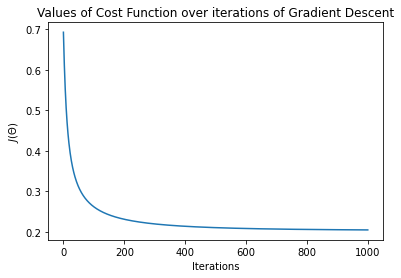

In [143]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

Alrededor de 500 iteraciones, el costo es fijo, por lo que las iteraciones restantes no son necesarias o no darán como resultado ninguna optimización adicional. 

### REFERENCIAS 

* https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f
* https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1
* https://github.com/lmntrixsid/Linear-and-Logistic-Regression-with-NumPy-and-Python/blob/master/Logistic_Regression_Completed.ipynb
* https://www.ellaberintodefalken.com/2019/03/regresion-lineal-descenso-de-gradiente.html
